# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

#import datetime
#from datetime import timedelta

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL for GET requests to retrieve weather data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# bulid query to call the required data 
query_url = f"{url}appid={api_key}&units={units}&q="

# define blank varaible 
weather_by_city = []

print("Beginning Data Retrival")

# looping all cities to get list of effected cities 
for city in cities:
    try:         
        url = query_url + city
        response = requests.get(url).json()
        weather_by_city.append(response)
        print(f'Processing Record for | {city}') 
    except:
        continue


Beginning Data Retrival
Processing Record for | tharad
Processing Record for | geraldton
Processing Record for | tazovskiy
Processing Record for | tuktoyaktuk
Processing Record for | rikitea
Processing Record for | illoqqortoormiut
Processing Record for | praia
Processing Record for | charters towers
Processing Record for | umzimvubu
Processing Record for | atasu
Processing Record for | bambous virieux
Processing Record for | pevek
Processing Record for | sidi ali
Processing Record for | ushuaia
Processing Record for | kati
Processing Record for | narsaq
Processing Record for | yellowknife
Processing Record for | puerto ayora
Processing Record for | buariki
Processing Record for | dhidhdhoo
Processing Record for | hobart
Processing Record for | dolbeau
Processing Record for | jamestown
Processing Record for | asau
Processing Record for | dong hoi
Processing Record for | yaan
Processing Record for | bluff
Processing Record for | victoria
Processing Record for | alofi
Processing Record f

Processing Record for | shimoda
Processing Record for | boyolangu
Processing Record for | verkhoyansk
Processing Record for | surin
Processing Record for | leme
Processing Record for | georgetown
Processing Record for | kostino
Processing Record for | kahului
Processing Record for | tyubuk
Processing Record for | cazaje
Processing Record for | tual
Processing Record for | nizip
Processing Record for | bangkalan
Processing Record for | vryburg
Processing Record for | rovaniemi
Processing Record for | igrim
Processing Record for | miyako
Processing Record for | kiruna
Processing Record for | yabassi
Processing Record for | mount isa
Processing Record for | amderma
Processing Record for | lokosovo
Processing Record for | namatanai
Processing Record for | tenango
Processing Record for | taoudenni
Processing Record for | louisbourg
Processing Record for | manzil salim
Processing Record for | ereymentau
Processing Record for | sangar
Processing Record for | mnogovershinnyy
Processing Record 

Processing Record for | vredendal
Processing Record for | pochutla
Processing Record for | tadine
Processing Record for | pula
Processing Record for | nokaneng
Processing Record for | palamuse
Processing Record for | eyl
Processing Record for | aksu
Processing Record for | praya
Processing Record for | inuvik
Processing Record for | severnoye
Processing Record for | tatarka
Processing Record for | kruisfontein
Processing Record for | namibe
Processing Record for | presque isle
Processing Record for | ixtapa
Processing Record for | okhotsk
Processing Record for | palabuhanratu
Processing Record for | almaznyy
Processing Record for | goderich
Processing Record for | ust-nera
Processing Record for | mahasamund
Processing Record for | sungurlu
Processing Record for | gravdal
Processing Record for | ulaangom
Processing Record for | balabac
Processing Record for | ngukurr
Processing Record for | mitu
Processing Record for | bairiki
Processing Record for | grand centre
Processing Record for |

In [4]:
#pretty print JSON for citi data
response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))
#print(weather_by_city)

{
    "base": "stations",
    "clouds": {
        "all": 92
    },
    "cod": 200,
    "coord": {
        "lat": 29.04,
        "lon": 114.56
    },
    "dt": 1547490267,
    "id": 1786538,
    "main": {
        "grnd_level": 988.8,
        "humidity": 99,
        "pressure": 988.8,
        "sea_level": 1039.8,
        "temp": 5.05,
        "temp_max": 5.05,
        "temp_min": 5.05
    },
    "name": "Yining",
    "rain": {
        "3h": 0.195
    },
    "sys": {
        "country": "CN",
        "message": 0.0035,
        "sunrise": 1547421391,
        "sunset": 1547459126
    },
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 331.503,
        "speed": 1.17
    }
}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#define list comprehension to define and collected the data 
date = [data.get ("dt") for data in weather_by_city]

lat = [data.get("coord", {}).get("lat") for data in weather_by_city]
max_temp = [data.get("main", {}).get("temp_max") for data in weather_by_city]
humidity = [data.get("main", {}).get("humidity") for data in weather_by_city]

wind = [data.get("wind", {}).get("speed") for data in weather_by_city]
cloud = [data.get("clouds", {}).get("all") for data in weather_by_city]

name = [data.get("name") for data in weather_by_city]
lng = [data.get("coord", {}).get("lon") for data in weather_by_city]
country = [data.get("sys", {}).get("country") for data in weather_by_city]


#Summaries data and count the effect number
weather_df = pd.DataFrame({"City": name,"Cloudiness": cloud, "Country":country , "Date": date,"Humidity": humidity, "Lat": lat,"Lng": lng, "Max Temp": max_temp,  "Wind Speed": wind, })
weather_df.count()


City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [6]:
#Dataframe all the required index
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tharad,0.0,IN,1.547491e+09,53.0,24.39,71.63,14.73,4.02
1,Geraldton,90.0,CA,1.547489e+09,62.0,49.72,-86.95,-7.00,3.10
2,Tazovskiy,76.0,RU,1.547490e+09,81.0,67.47,78.70,-7.75,6.37
3,Tuktoyaktuk,75.0,CA,1.547485e+09,75.0,69.44,-133.03,-25.00,7.70
4,Rikitea,100.0,PF,1.547490e+09,97.0,-23.12,-134.97,26.65,4.92


In [7]:
#export the city data into a .csv file
weather_df.to_csv("weather_by_cities.csv", sep=',', index=False)

In [ ]:
#converting julian date and time of affected cities
#date = [data.get ("dt") for data in weather_by_city]
#New_Date =(date.to_datetime((date // 1000).astype(str)) + date.to_timedelta(date % 1000, unit='D')
#print(New_Date)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

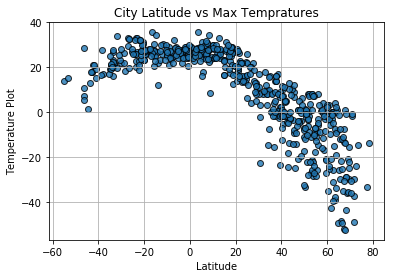

In [8]:
#Define scatterplot latitude vs Windspeed 
plt.title('City Latitude vs Max Tempratures')
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolors="black", alpha =0.8, linewidths=1)
plt.xlabel("Latitude")
plt.ylabel("Temperature Plot")
plt.grid(True)

#### Latitude vs. Humidity Plot

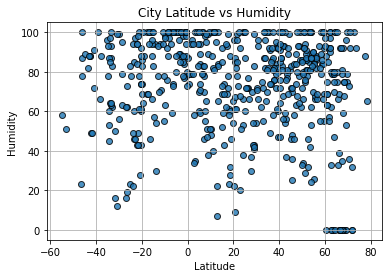

In [9]:

plt.title('City Latitude vs Humidity')
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolors="black", alpha =0.8, linewidths=1)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

#### Latitude vs. Cloudiness Plot

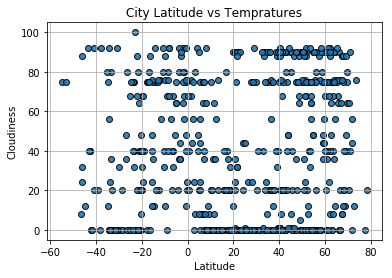

In [10]:
plt.title('City Latitude vs Tempratures')
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolors="black", alpha =0.9, linewidths=1)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

#### Latitude vs. Wind Speed Plot

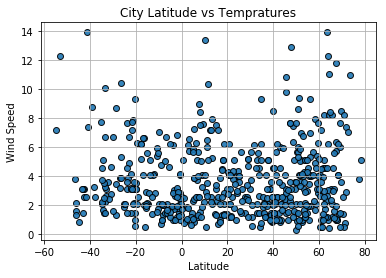

In [11]:
plt.title('City Latitude vs Tempratures')
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolors="black", alpha =0.9, linewidths=1)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)